<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/Sian's_PCA_1DCNN_(Unsupervised_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IoT-23 Data preprocessing
- Collection
- Cleaning
- Encoding
- Scaling
- Normalisation

Collect the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Data Collection
data_file_path = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 8GB Dataset/CTU-IoT-Malware-Capture-35-1-log.txt'
#data_file_path = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 8GB Dataset/CTU-IoT-Malware-Capture-1-1-log.txt'

#Read the file
df = pd.read_csv(
    data_file_path,
    sep="\t",
    comment="#",
    header=None,
    names=[
        "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
        "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
        "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
        "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "label"
    ]
)

# #TEST:
# # List of file paths
# data_file_paths = [
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/Benign_Dataset13.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/DoS_Dataset21.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/GafgytBotnet_Dataset3.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/MiraiBotnet_Dataset1.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/MiraiVariant_Dataset5.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/OkiruBotnet_Dataset17.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/PartOfMioriBotnet_Dataset20.csv'

# ]
# dfs = []#set the df list var

# for file_path in data_file_paths: # Loop through the file paths and add the data to a temp df var
#   try:
#       temp_df = pd.read_csv(
#           file_path,
#           sep=",", # Changed separator to tab sep="\t",
#           comment="#",
#           header= 0, # Changed header to None header= None,
#           names=[
#               "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
#               "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
#               "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
#               "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "label"
#           ]
#       )
#       dfs.append(temp_df) #add the info in the temp df to the dfs list
#       print(f"Loaded file: {file_path} with {len(temp_df)} rows")
#   except Exception as e:
#       print(f"Error reading file {file_path}: {e}")

# # Concatenate all dataframes into one
# df = pd.concat(dfs, ignore_index=True) #make the list of dataframes into one big dataframe


print("\nInitial sample:")
print(df.head().to_string())


Initial sample:
             ts                 uid      id.orig_h  id.orig_p       id.resp_h  id.resp_p proto service  duration orig_bytes resp_bytes conn_state local_orig local_resp  missed_bytes history  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes                label
0  1.545403e+09  CdNmOg26ZIaBRzPvWj  192.168.1.196      59932  104.248.160.24         80   tcp       -  3.097754          0          0         S0          -          -             0       S          3            180          0              0  -   Malicious   C&C
1  1.545403e+09  CgzGV333k9WCximeu8  192.168.1.196      59932  104.248.160.24         80   tcp       -         -          -          -         S0          -          -             0       S          1             60          0              0  -   Malicious   C&C
2  1.545403e+09  CLm5Pd3ZnqmYVjrZ44  192.168.1.196      59932  104.248.160.24         80   tcp       -         -          -          -         S0          -          -             0       S     

Process the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Cleaning
# Convert timestamp to datetime
df["ts"] = pd.to_datetime(df["ts"], unit="s", errors='coerce')

# Drop non-informative and redundant columns
df.drop(columns=['uid', 'id.orig_h', 'id.resp_h', 'local_orig', 'local_resp', 'history'], inplace=True)

# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Drop rows with missing data fields
df.dropna(subset=[
    'duration', 'orig_bytes', 'resp_bytes', 'id.orig_p', 'id.resp_p',
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'
], inplace=True)

# Convert columns to numeric types
numeric_columns = [
    'duration', 'orig_bytes', 'resp_bytes', 'id.orig_p', 'id.resp_p',
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'missed_bytes'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Encode categorical columns
categorical_columns = ['proto', 'conn_state', 'service']
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Ensure the data is a string
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert the label to binary (malicious=1, benign=0)
df['label'] = df['label'].apply(lambda x: 1 if 'Malicious' in str(x) else 0)

# Drop any rows still containing NaN
df.dropna(inplace=True)

# Display cleaned data
print("\nCleaned sample:")
print(df.head().to_string())
print("\nData info:")
print(df.info())


# Split features and labels
X = df.drop(columns=['label', 'ts']).values  # Drop label and timestamp
y = df['label'].values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Counts the number of malware and benign logs
total_logs = len(df)
malware_logs = df['label'].sum()  # since malware = 1
benign_logs = total_logs - malware_logs

print(f"\nTotal logs: {total_logs}")
print(f"Malware logs: {malware_logs}")
print(f"Benign (non-malicious) logs: {benign_logs}")


Cleaned sample:
                             ts  id.orig_p  id.resp_p  proto  service  duration  orig_bytes  resp_bytes  conn_state  missed_bytes  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  label
0 2018-12-21 14:34:02.863611937      59932         80      1        3  3.097754           0           0           6             0          3            180          0              0      1
3 2018-12-21 14:34:13.913069010      35883         53      2        1  5.005148          78           0           6             0          2            134          0              0      0
4 2018-12-21 14:34:03.902539968      43531         53      2        1  5.005145          78           0           6             0          2            134          0              0      0
6 2018-12-21 14:34:47.880949974      39189         53      2        1  5.005149          78           0           6             0          2            134          0              0      0
7 2018-12-21 14:34:11.880244970       

#Apply PCA

In [3]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=13) #Make the number of components the number of features in a data sample - so 13 #if PCA = 10 then it will reduce the dimensionality of the data to exactly 10 features
X_pca = pca.fit_transform(X_scaled)

# Display the number of data features dropped
print(f"Reduced {X_scaled.shape[1]} to {X_pca.shape[1]} components")

#Shape of the data (rows, data features)
print(X_pca.shape)

Reduced 13 to 10 components
(6015172, 10)


# Data reshaping for 1D CNN input
creating x_training data that is only benign and x_test that is both malicious and benign

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

# Reshape the data for 1D CNN input
X_1dcnn = X_pca.reshape((X_pca.shape[0], X_pca.shape[1], 1)) # expected input shape: (number of samples, timesteps: number of PCA components, each timestep holds one PCA scalar value)

# Train/Validation/Test Split
# Separate benign and malicious data
X_benign = X_1dcnn[y == 0]
y_benign = y[y == 0]

X_malicious = X_1dcnn[y == 1]
y_malicious = y[y == 1]

# Split into Train/Val/Test sets
# Benign split into 80% train and valadation (X_temp) and 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_benign, y_benign, test_size=0.2, random_state=42, stratify=y_benign) # stratify=y_benign to balance the representation of malicious and normal classes in each set when the data is split.

# Split X_temp into train and val (85% train, 15% val)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp)


# # Combine benign and malicious test sets:
# print("Number of benign (normal) test samples:", len(X_test))
# print("Number of malicious test samples:", len(X_malicious))

# X_test = np.concatenate([X_test, X_malicious], axis=0)
# y_test = np.concatenate([y_test, y_malicious], axis=0)
# Determine how many samples we can take from each

#TEST
num_benign = len(X_test)
num_malicious = len(X_malicious)
min_len = min(num_benign, num_malicious)

# Trim both to the same size
X_test_balanced = np.concatenate([X_test[:min_len], X_malicious[:min_len]], axis=0)
y_test_balanced = np.concatenate([y_test[:min_len], y_malicious[:min_len]], axis=0)
#---------------------------------

# # Shuffle data in the sets
# X_train, y_train = shuffle(X_train, y_train, random_state=42)
# X_val, y_val = shuffle(X_val, y_val, random_state=42)
# X_test, y_test = shuffle(X_test, y_test, random_state=42)
#TEST
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)
X_test, y_test = shuffle(X_test_balanced, y_test_balanced, random_state=42)

# Final Shape Confirmation
print("1D CNN input shape:", X_1dcnn.shape)
print(f"Shapes in Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

1D CNN input shape: (6015172, 10, 1)
Shapes in Train: (2793671, 10, 1), Val: (493001, 10, 1), Test: (1643336, 10, 1)


#1D CNN model
Since there's no ground truth, the CNN won't learn to map inputs to labels. Instead, the model will try to measure how far data features are from a "normal" center (e.g., Deep SVDD).

To convert the supervised CNN pipeline into an unsupervised CNN for anomaly detection, dependency on labels during training need to be removed.

Deep SVDD-style unsupervised CNN:
*   The CNN learns to map all “normal” data (benign traffic) to a compact region in feature space.
*   Anomalies (malicious traffic) are later detected based on distance from the learned center.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

#Step 3: Define the 1D CNN Model

# Define input shape
input_shape = (X_train.shape[1], 1)  # (timesteps, features)
print("Input shape:", input_shape)#TEST

# CNN feature extractor model
# The model extracts meaningful features from the input data using its convolutional layers.
# The final output is a learned feature vector for each input sample.
# No classification of the samples are made.
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape), # Detect patterns in the network traffic data
    BatchNormalization(), # Normalizes the outputs of a the Conv1D layer before passing them to the MaxPool layer
    MaxPooling1D(pool_size=2), # Reduce the dimensions of the data without affecting key features
    Dropout(0.25), # Prevent overfitting by forcing the model to generalize - it does this by randomly deactivating a fraction of neurons during training

    Conv1D(filters=64, kernel_size=3, activation='relu'), #64
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(), # Converts the output of the last Conv1D layer into a 1D vector for the fully connected layers
    Dense(64, activation='relu'), # Fully connected layer, which learns the complex combinations of the features extracted in the previous layer
    Dropout(0.5),

    Dense(32, activation='linear')  # Feature vector output (not classification)
])



Input shape: (10, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Create the Custom SVDD-style Loss
Compute the distance of output features from a learned center in the feature space. Flagging anomalies as samples with high feature-space distance from center.

The model outputs a feature vector for each input network traffic sample.
The center vector represents the average feature vector of normal (benign) traffic. Normal samples produce features close to this center and anomalies should produce features far away from this center.

In [6]:
import tensorflow.keras.backend as K
# Create custom  loss function

# Define the center vector, which will be initlaised to zero and then to the actual mean feature vector after feature extraction
center = K.variable(np.zeros((32,), dtype=np.float32), name='center')
print(f"Initial center shape: {center.shape}")

# Custom SVDD loss function: Euclidean distance from center
def svdd_loss(y_true, y_pred):
    return K.mean(K.sum(K.square(y_pred - center), axis=1))

Initial center shape: (32,)


#Compile model

In [7]:
# Step 5: Compile the Model
model.compile(optimizer='adam', loss = svdd_loss) #model is trained using a custom loss function that encourages it to map benign data sample near a specific center point in a feature space.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,960 (50.62 KB)

 Trainable params: 12,768 (49.88 KB)

 Non-trainable params: 192 (768.00 B)

#Train Model

X_train dtype: float64
dummy_y_train dtype: float32
Epoch 1/5
43652/43652 ━━━━━━━━━━━━━━━━━━━━ 237s 5ms/step - loss: 0.1334 - val_loss: 0.2496
Epoch 2/5
43652/43652 ━━━━━━━━━━━━━━━━━━━━ 287s 6ms/step - loss: 4.1119e-07 - val_loss: 1.6463e-04
Epoch 3/5
43652/43652 ━━━━━━━━━━━━━━━━━━━━ 240s 5ms/step - loss: 1.0060e-06 - val_loss: 5.2188e-08
Epoch 4/5
43652/43652 ━━━━━━━━━━━━━━━━━━━━ 260s 5ms/step - loss: 3.6577e-08 - val_loss: 3.4991
Epoch 5/5
43652/43652 ━━━━━━━━━━━━━━━━━━━━ 242s 6ms/step - loss: 3.2896e-07 - val_loss: 2.2114e-05


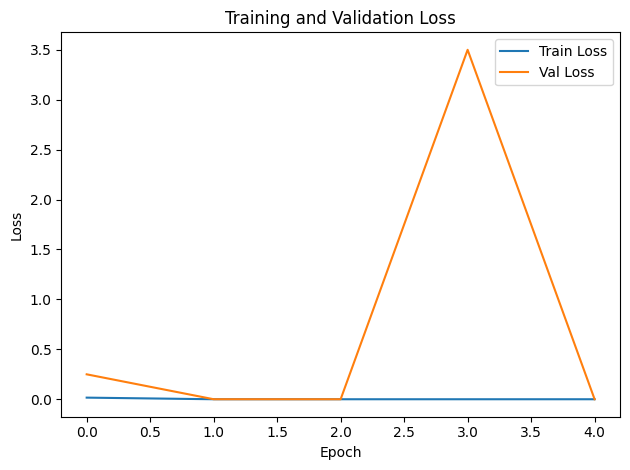

In [8]:
#Step 6: Train the Model
# Generate dummy labels (all zeros), same length as the input and float32 data type
dummy_y_train = np.zeros((X_train.shape[0],), dtype=np.float32)
dummy_y_val = np.zeros((X_val.shape[0],), dtype=np.float32)

print("X_train dtype:", X_train.dtype)
print("dummy_y_train dtype:", dummy_y_train.dtype)

# Train the model using dummy labels
history = model.fit(
    X_train, dummy_y_train,
    epochs= 5, #10
    batch_size=64,
    validation_data=(X_val, y_val), #change to actual y_val values #dummy_y_val
    verbose=1
)

# Plot Loss
import matplotlib.pyplot as plt # Import matplotlib
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Val Loss')  # Safe in case val_loss wasn't tracked
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Model seems to be overfitting at the momment
# The ideal shape should be downward sloping curves that are close together

#Anomaly Detection Phase
Get feature vectors from the trained model and compute distance to center where large distances indicates anomalies.

In [9]:
# Compute center of benign training data in feature space
X_train_features = model.predict(X_train)

# Compute the center (mean vector)
print(f"Mean feature vector of benign training samples: {np.mean(X_train_features, axis=0)}")# Print the mean vector
new_center = np.mean(X_train_features, axis=0).astype(np.float32)  # Shape: (32,)

# Update the Keras variable `center`
K.set_value(center, new_center)

print("Center vector updated. New center shape:", new_center.shape)

# Predict features for X_test
X_test_features = model.predict(X_test) # Trained CNN model without the final classification layer; Shape of X_test_features: (num_samples, feature_dim)

# Calculate the Euclidean distance from the updated center for each sample to detect maclicious samples
distances = np.linalg.norm(X_test_features - new_center, axis=1) # Center is the mean vector of all benign embeddings from the training set #K.eval(new_center)

threshold = np.percentile(distances, 0.5) # Calculates the 50th percentile (the median) of all distances of samples from the center for the threshold

unsupervised_predictions = (distances > threshold).astype(int) # Samples with distances greater than the threshold are labeled 1 (malicious) and others are labeled 0 (normal/benign).



87303/87303 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step
Mean feature vector of benign training samples: [ 1.4120285e-04 -8.6992623e-05  4.6957857e-06 -1.2753789e-04
 -2.0339563e-04  2.1904339e-04  5.3880531e-06 -1.8112711e-05
  6.9349408e-06  3.9751896e-05 -4.0753086e-05  2.1300388e-04
  1.9936200e-04 -7.6975179e-05 -2.1398546e-04  1.9052913e-04
  1.7655399e-04  1.1205563e-04  2.8619759e-05  2.4492407e-04
  8.7903165e-05 -5.3768596e-05 -2.7056001e-05 -1.9412265e-04
  2.1803974e-04 -1.8503721e-05  1.2515558e-04 -7.9022961e-05
 -1.9401830e-04  1.6640885e-04  1.6642219e-04 -5.5533699e-05]
Center vector updated. New center shape: (32,)
51355/51355 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step


#Detection Phase Visulisation

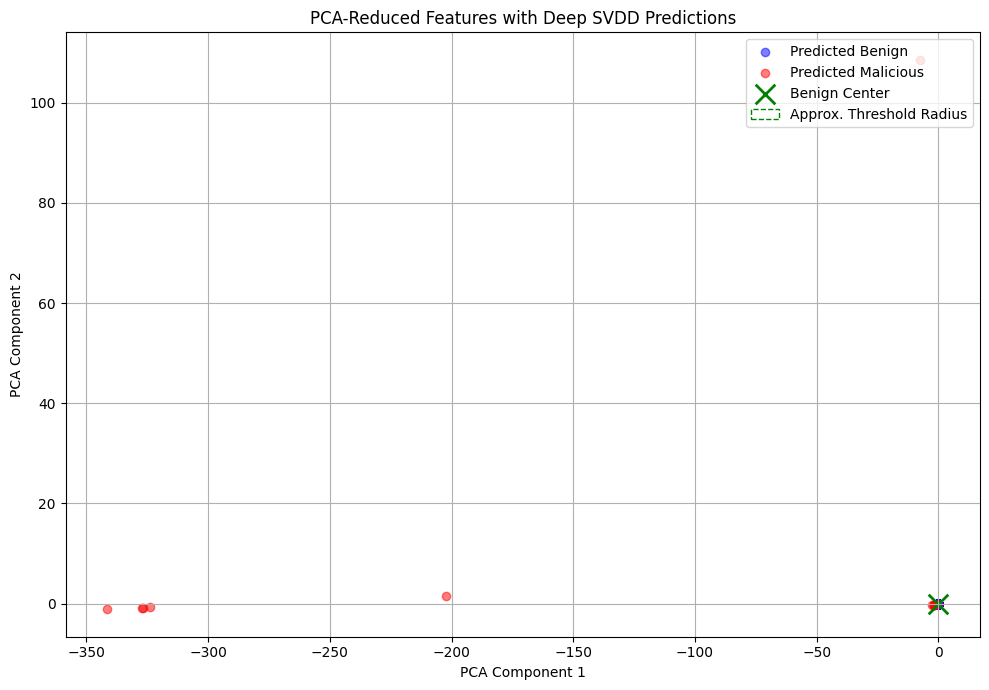

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import matplotlib.cm as cm

# Step 1: Reduce 32D feature vectors to 2D using PCA
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test_features)

# Step 2: Also reduce the center to 2D
center_2D = pca.transform(K.eval(center).reshape(1, -1))[0]  # Shape: (2,)

# Step 3: Plotting
plt.figure(figsize=(10, 7))

# Step 4: Separate benign and malicious samples based on prediction
benign_mask = (unsupervised_predictions == 0)
malicious_mask = (unsupervised_predictions == 1)

# Plot benign points
plt.scatter(
    X_test_2D[benign_mask, 0], X_test_2D[benign_mask, 1],
    color='blue', alpha=0.5, label='Predicted Benign'
)

# Plot malicious points
plt.scatter(
    X_test_2D[malicious_mask, 0], X_test_2D[malicious_mask, 1],
    color='red', alpha=0.5, label='Predicted Malicious'
)

# Step 5: Plot center point
plt.scatter(
    center_2D[0], center_2D[1],
    color='green', marker='x', s=200, linewidths=2, label='Benign Center'
)

# Step 6: Optional threshold radius around the center (in 2D PCA space)
# Note: The threshold is in original feature space – projecting it to 2D is approximate
approx_threshold_radius = np.percentile(
    np.linalg.norm(X_test_2D - center_2D, axis=1), 50  # or match your percentile
)
circle = Circle(center_2D, radius=approx_threshold_radius, color='green',
                fill=False, linestyle='--', label='Approx. Threshold Radius')
plt.gca().add_patch(circle)

# Step 7: Final plot aesthetics
plt.title('PCA-Reduced Features with Deep SVDD Predictions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-946806231.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


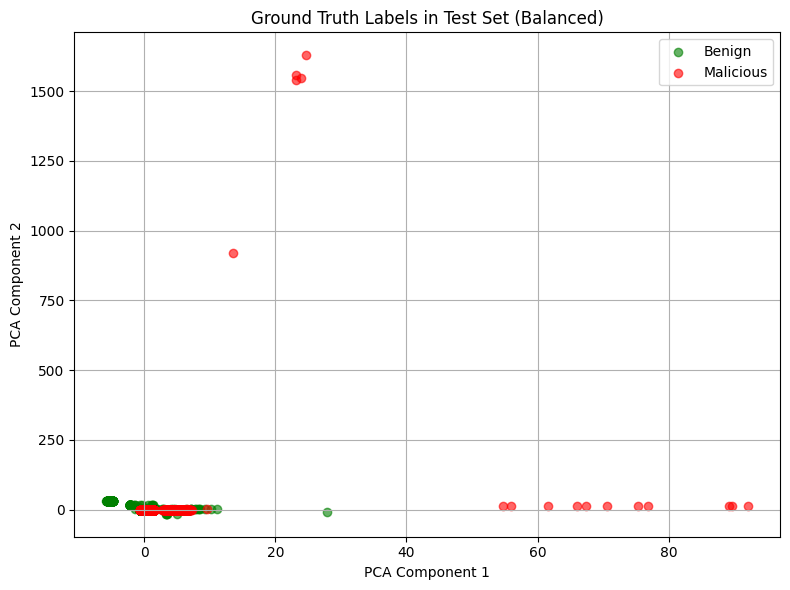

In [11]:
import matplotlib.pyplot as plt

# Step 1: Flatten X_test_balanced back to 2D for plotting (remove the CNN channel dimension)
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Step 2: Plot using first 2 PCA components
plt.figure(figsize=(8, 6))
plt.scatter(
    X_test_flat[y_test == 0][:, 0], X_test_flat[y_test == 0][:, 1],
    c='green', label='Benign', alpha=0.6
)
plt.scatter(
    X_test_flat[y_test == 1][:, 0], X_test_flat[y_test== 1][:, 1],
    c='red', label='Malicious', alpha=0.6
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Ground Truth Labels in Test Set (Balanced)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Evaluate Detection Results

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Plot Training Loss (no accuracy in unsupervised setting)
plt.figure(figsize=(10, 4))

# Evaluate predictions against ground truth
print("\nClassification Report on Test Set:")
print(classification_report(y_test, unsupervised_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, unsupervised_predictions)
print("Confusion Matrix:")
print(cm)

# Detailed breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (Benign correctly classified): {tn}")
print(f"False Positives (Benign misclassified as malware): {fp}")
print(f"False Negatives (Malware missed): {fn}")
print(f"True Positives (Malware correctly identified): {tp}")
print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn)}")
print(f"Precision: {tp / (tp + fp)}")
print(f"Recall: {tp / (tp + fn)}")



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    821668
           1       0.42      0.00      0.00    821668

    accuracy                           0.50   1643336
   macro avg       0.46      0.50      0.33   1643336
weighted avg       0.46      0.50      0.33   1643336

Confusion Matrix:
[[821661      7]
 [821663      5]]

True Negatives (Benign correctly classified): 821661
False Positives (Benign misclassified as malware): 7
False Negatives (Malware missed): 821663
True Positives (Malware correctly identified): 5
Accuracy: 0.49999878296343536
Precision: 0.4166666666666667
Recall: 6.085182823232742e-06


<Figure size 1000x400 with 0 Axes>